In [45]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [81]:
crime_rates=pd.read_csv("crime_data.csv")

In [12]:
crime_rates.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
crime_rates.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [16]:
crime_rates.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [54]:
crime_rates.drop('Unnamed: 0',
  axis='columns', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [21]:
crime_rates.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [47]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(crime_rates)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116 -1.56203089]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392  1.33061891]
 [ 0.07236067  1.49381682  1.00912225  1.05346626  1.33061891]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398 -1.56203089]
 [ 0.28109336  1.2756352   1.77678094  2.08881393  1.33061891]
 [ 0.02597562  0.40290872  0.86954794  1.88390137  1.33061891]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319 -0.59781429]
 [-0.43787481  0.81502956  0.45082502 -0.58583422 -0.59781429]
 [ 1.76541475  1.99078607  1.00912225  1.1505301   1.33061891]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293 -1.56203089]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987 -0.59781429]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217  0.36640231]
 [ 0.60578867  0.94836277  1.21848371  0.29852525  1.33061891]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209  -0.59781429]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345  0.36640231]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705 -0.59

# K-MEANS CLUSTERING

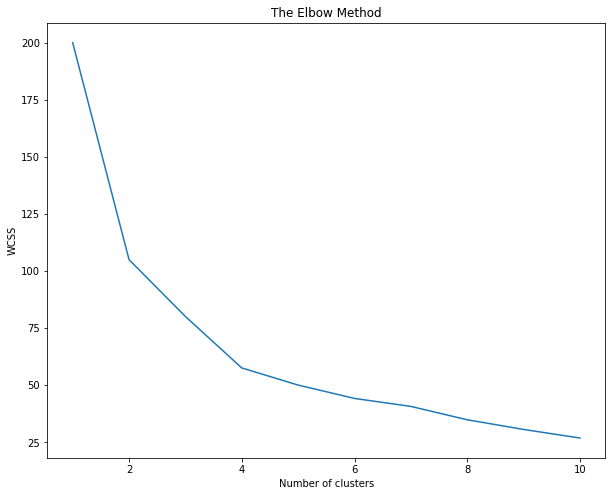

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [25]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime_rates['cluster'] = cluster

In [26]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

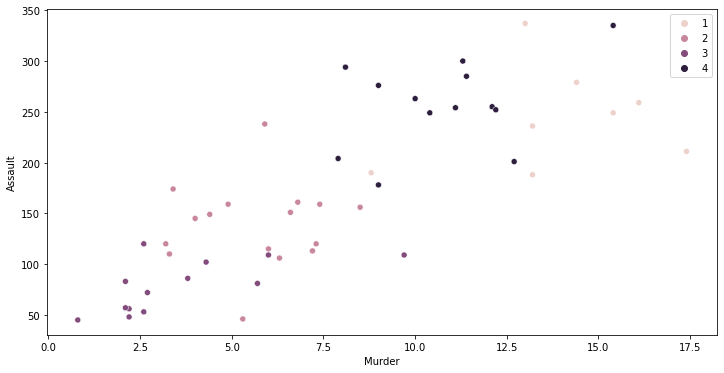

In [38]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['Murder'], y = crime_rates['Assault'],hue=y_kmeans1)

In [28]:
crime_rates[crime_rates['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,1
3,8.8,190,50,19.5,1
9,17.4,211,60,25.8,1
17,15.4,249,66,22.2,1
23,16.1,259,44,17.1,1
32,13.0,337,45,16.1,1
39,14.4,279,48,22.5,1
41,13.2,188,59,26.9,1


In [31]:
crime_rates[crime_rates['cluster']==2]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
10,5.3,46,83,20.2,2
13,7.2,113,65,21.0,2
15,6.0,115,66,18.0,2
20,4.4,149,85,16.3,2
29,7.4,159,89,18.8,2
34,7.3,120,75,21.4,2
35,6.6,151,68,20.0,2
36,4.9,159,67,29.3,2


In [32]:
crime_rates[crime_rates['cluster']==3]

,Murder,Assault,UrbanPop,Rape,cluster
11,2.6,120,54,14.2,3
14,2.2,56,57,11.3,3
16,9.7,109,52,16.3,3
18,2.1,83,51,7.8,3
22,2.7,72,66,14.9,3
25,6.0,109,53,16.4,3
26,4.3,102,62,16.5,3
28,2.1,57,56,9.5,3
33,0.8,45,44,7.3,3
40,3.8,86,45,12.8,3


In [39]:
crime_rates[crime_rates['cluster']==4]

,Murder,Assault,UrbanPop,Rape,cluster
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
8,15.4,335,80,31.9,4
12,10.4,249,83,24.0,4
19,11.3,300,67,27.8,4
21,12.1,255,74,35.1,4
24,9.0,178,70,28.2,4
27,12.2,252,81,46.0,4


# CSV FILE DOWNLOAD AFTER CLUSTERING

In [43]:
from IPython.display import HTML
import base64

df = crime_rates
def create_download_link( df, title = "Download CSV file After The Clustering", filename = "crime.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# DBSCAN Clustering

In [58]:
array=crime_rates.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ],
       [  8.1, 294. ,  80. ,  31. ,   4. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   4. ],
       [  7.9, 204. ,  78. ,  38.7,   4. ],
       [  3.3, 110. ,  77. ,  11.1,   2. ],
       [  5.9, 238. ,  72. ,  15.8,   2. ],
       [ 15.4, 335. ,  80. ,  31.9,   4. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   2. ],
       [  2.6, 120. ,  54. ,  14.2,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   4. ],
       [  7.2, 113. ,  65. ,  21. ,   2. ],
       [  2.2,  56. ,  57. ,  11.3,   3. ],
       [  6. , 115. ,  66. ,  18. ,   2. ],
       [  9.7, 109. ,  52. ,  16.3,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   3. ],
       [ 11.3, 300. ,  67. ,  27.8,   4. ],
       [  4.4, 149. ,  85. ,  16.3,   2. ],
       [ 12.1, 255. ,  74. ,  35.1,   4. ],
       [  2.7,  72. ,  66. ,  14

In [73]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [74]:
db_default = DBSCAN(eps = 0.8, min_samples = 6).fit(X)
labels = db_default.labels_

In [75]:
#-1 is an noise
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [76]:
data=pd.DataFrame(labels,columns=['db_cluster'])

In [77]:
data

,db_cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [80]:
pd.concat([crime_rates,data],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster,db_cluster
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,4,-1
2,8.1,294,80,31.0,4,-1
3,8.8,190,50,19.5,1,-1
4,9.0,276,91,40.6,4,-1
5,7.9,204,78,38.7,4,-1
6,3.3,110,77,11.1,2,-1
7,5.9,238,72,15.8,2,-1
8,15.4,335,80,31.9,4,-1
9,17.4,211,60,25.8,1,-1


# Hierarchical Clustering

In [84]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [87]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime_rates.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [88]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

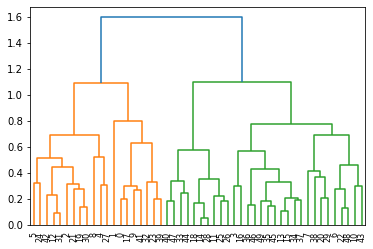

In [89]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [91]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [92]:
ac

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [93]:
# save clusters for chart
y_ac = ac.fit_predict(df_norm)
Clusters=pd.DataFrame(y_ac,columns=['Clusters'])

In [94]:
Clusters

,Clusters
0,3
1,4
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [96]:
df_norm['Clusters'] = ac.labels_

In [98]:
df_norm

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,4
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


<AxesSubplot:>

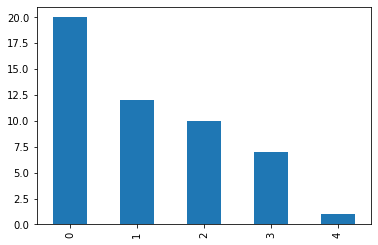

In [99]:
df_norm['Clusters'].value_counts().plot.bar()

In [100]:
df_norm.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.296084,0.298973,0.657627,0.279070
1,1,0.607430,0.725742,0.785311,0.644703
2,2,0.143373,0.115411,0.293220,0.111886
3,3,0.835628,0.706458,0.377724,0.371724
4,4,0.554217,0.746575,0.271186,0.961240
